In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.metrics import accuracy_score,f1_score
from sklearn.svm import SVC
#from bayes_opt import BayesianOptimization
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.utils import resample


Data Import


In [3]:
# Motornummer, Zeitschritt
index_columns_names =  ["UnitNumber","Cycle"]
# 3 betriebsbereite Sensoreinstellungen
operational_settings_columns_names = ["Operation Setting "+str(i) for i in range(1,4)]
# 21 Sensormessungen
sensor_measure_columns_names =["Sensor Measure "+str(i) for i in range(1,22)]

input_file_column_names = index_columns_names + operational_settings_columns_names + sensor_measure_columns_names

df_train = pd.read_csv('/Users/niklasquendt/Documents/Uni/PSDA/Uebung2/data/train_FD001.txt', delim_whitespace=True, header=None)
df_test = pd.read_csv('/Users/niklasquendt/Documents/Uni/PSDA/Uebung2/data/test_FD001.txt', delim_whitespace=True, header=None)
rul1 = pd.read_csv('/Users/niklasquendt/Documents/Uni/PSDA/Uebung2/data/RUL_FD001.txt', delim_whitespace=True, header=None)

df_train.columns = input_file_column_names
df_test.columns = input_file_column_names
print("Größe der Daten : Rows {}, Columns {}".format(df_train.shape[0], df_train.shape[1]))
df_train.head(10)




Größe der Daten : Rows 20631, Columns 26


,UnitNumber,Cycle,Operation Setting 1,Operation Setting 2,Operation Setting 3,Sensor Measure 1,Sensor Measure 2,Sensor Measure 3,Sensor Measure 4,Sensor Measure 5,...,Sensor Measure 12,Sensor Measure 13,Sensor Measure 14,Sensor Measure 15,Sensor Measure 16,Sensor Measure 17,Sensor Measure 18,Sensor Measure 19,Sensor Measure 20,Sensor Measure 21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
5,1,6,-0.0043,-0.0001,100.0,518.67,642.10,1584.47,1398.37,14.62,...,521.68,2388.03,8132.85,8.4108,0.03,391,2388,100.0,38.98,23.3669
6,1,7,0.0010,0.0001,100.0,518.67,642.48,1592.32,1397.77,14.62,...,522.32,2388.03,8132.32,8.3974,0.03,392,2388,100.0,39.10,23.3774
7,1,8,-0.0034,0.0003,100.0,518.67,642.56,1582.96,1400.97,14.62,...,522.47,2388.03,8131.07,8.4076,0.03,391,2388,100.0,38.97,23.3106
8,1,9,0.0008,0.0001,100.0,518.67,642.12,1590.98,1394.80,14.62,...,521.79,2388.05,8125.69,8.3728,0.03,392,2388,100.0,39.05,23.4066
9,1,10,-0.0033,0.0001,100.0,518.67,641.71,1591.24,1400.46,14.62,...,521.79,2388.06,8129.38,8.4286,0.03,393,2388,100.0,38.95,23.4694


In [4]:
df_test.head(10)


,UnitNumber,Cycle,Operation Setting 1,Operation Setting 2,Operation Setting 3,Sensor Measure 1,Sensor Measure 2,Sensor Measure 3,Sensor Measure 4,Sensor Measure 5,...,Sensor Measure 12,Sensor Measure 13,Sensor Measure 14,Sensor Measure 15,Sensor Measure 16,Sensor Measure 17,Sensor Measure 18,Sensor Measure 19,Sensor Measure 20,Sensor Measure 21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130
5,1,6,0.0012,0.0003,100.0,518.67,642.11,1579.12,1395.13,14.62,...,521.92,2388.08,8127.46,8.4238,0.03,392,2388,100.0,38.91,23.3467
6,1,7,-0.0000,0.0002,100.0,518.67,642.11,1583.34,1404.84,14.62,...,522.01,2388.06,8134.97,8.3914,0.03,391,2388,100.0,38.85,23.3952
7,1,8,0.0006,-0.0000,100.0,518.67,642.54,1580.89,1400.89,14.62,...,522.09,2388.06,8125.93,8.4213,0.03,393,2388,100.0,39.05,23.3224
8,1,9,-0.0036,0.0000,100.0,518.67,641.88,1593.29,1412.28,14.62,...,522.03,2388.05,8134.15,8.4353,0.03,391,2388,100.0,39.10,23.4521
9,1,10,-0.0025,-0.0001,100.0,518.67,642.07,1585.25,1398.64,14.62,...,522.00,2388.06,8134.08,8.4093,0.03,391,2388,100.0,38.87,23.3820


In [5]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
UnitNumber,20631.0,51.506568,2.922763e+01,1.0000,26.0000,52.0000,77.0000,100.0000
Cycle,20631.0,108.807862,6.888099e+01,1.0000,52.0000,104.0000,156.0000,362.0000
Operation Setting 1,20631.0,-0.000009,2.187313e-03,-0.0087,-0.0015,0.0000,0.0015,0.0087
Operation Setting 2,20631.0,0.000002,2.930621e-04,-0.0006,-0.0002,0.0000,0.0003,0.0006
Operation Setting 3,20631.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
Sensor Measure 1,20631.0,518.670000,0.000000e+00,518.6700,518.6700,518.6700,518.6700,518.6700
Sensor Measure 2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
Sensor Measure 3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
Sensor Measure 4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
Sensor Measure 5,20631.0,14.620000,1.776400e-15,14.6200,14.6200,14.6200,14.6200,14.6200


In [6]:
#fehlende Daten ausgeben
df_train.isnull().sum()

#tbc

UnitNumber             0
Cycle                  0
Operation Setting 1    0
Operation Setting 2    0
Operation Setting 3    0
Sensor Measure 1       0
Sensor Measure 2       0
Sensor Measure 3       0
Sensor Measure 4       0
Sensor Measure 5       0
Sensor Measure 6       0
Sensor Measure 7       0
Sensor Measure 8       0
Sensor Measure 9       0
Sensor Measure 10      0
Sensor Measure 11      0
Sensor Measure 12      0
Sensor Measure 13      0
Sensor Measure 14      0
Sensor Measure 15      0
Sensor Measure 16      0
Sensor Measure 17      0
Sensor Measure 18      0
Sensor Measure 19      0
Sensor Measure 20      0
Sensor Measure 21      0
dtype: int64

Korrelationsmatrix

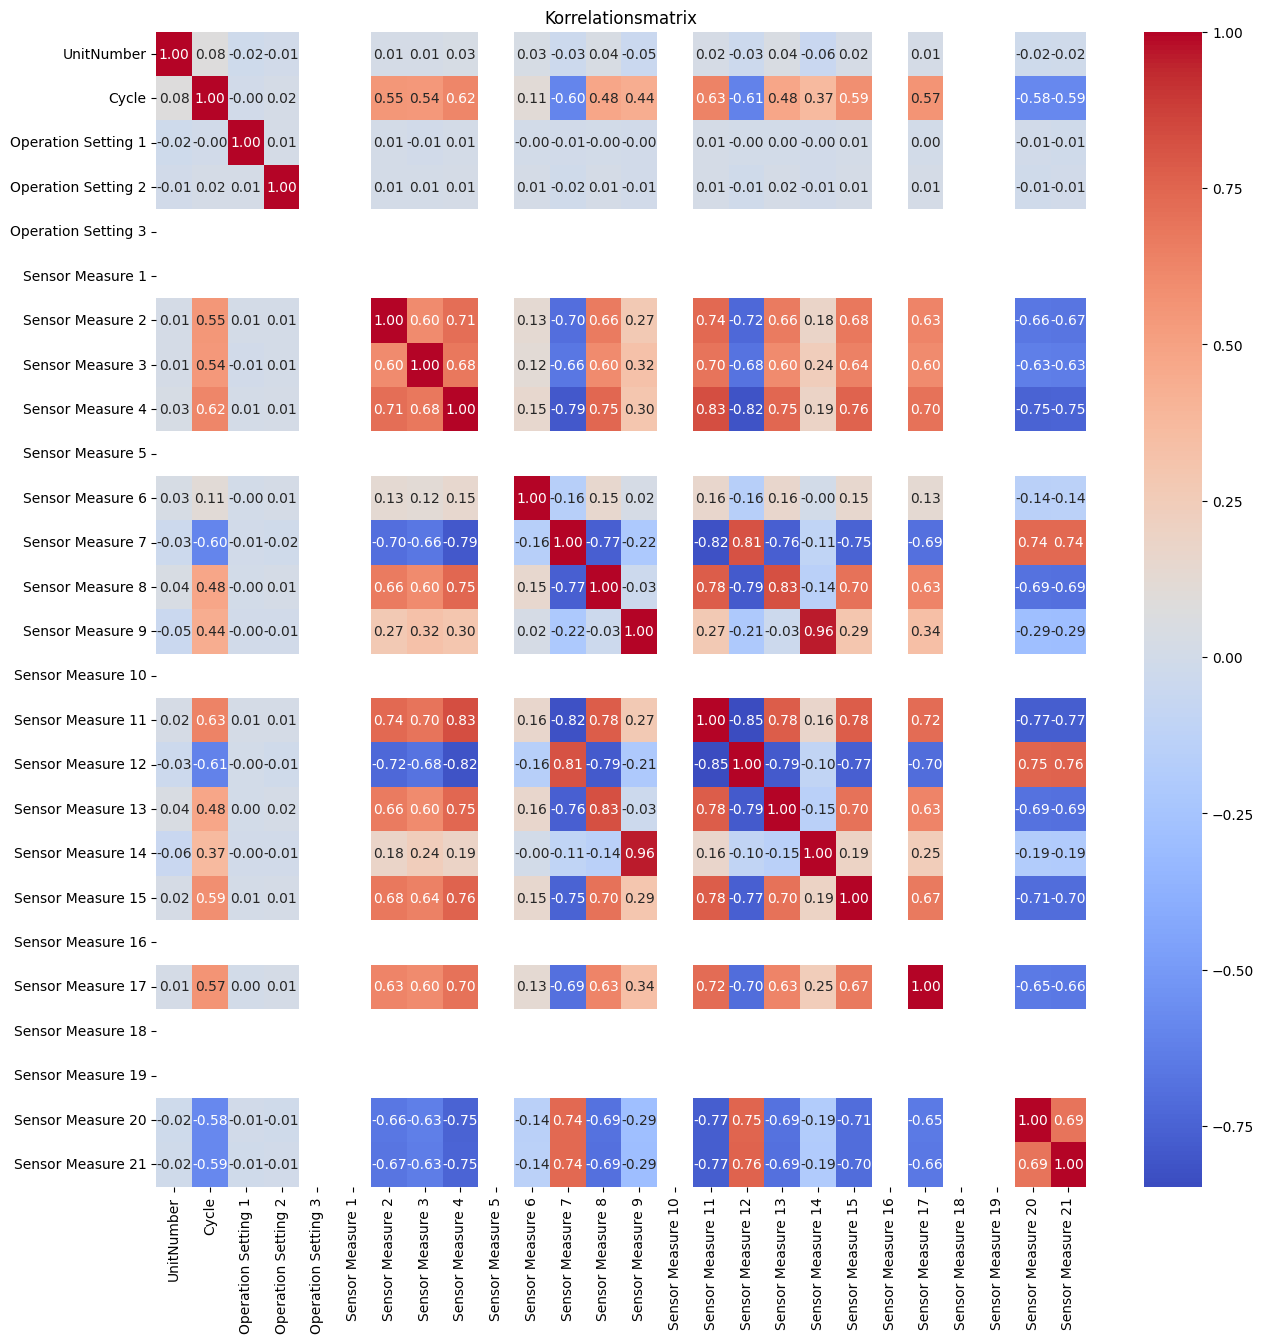

In [7]:
df_corr = df_train.corr()

# Korrelationsmatrix erstellen
correlation_matrix = df_train.corr()

#Korrelationsmatrix als Heatmap
plt.figure(figsize=(15, 15))  # Größe des Diagramms festlegen
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask = None)  # Heatmap mit Annotationsformat ".2f" für Dezimalstellen anzeigen
plt.title('Korrelationsmatrix')  # Diagrammtitel hinzufügen
plt.show()  # Heatmap anzeigen



In [8]:
# delete values that are not needed
delete_values =["Operation Setting 3", "Sensor Measure 1", "Sensor Measure 5", "Sensor Measure 6", "Sensor Measure 10", "Sensor Measure 16", "Sensor Measure 18", "Sensor Measure 19"]

df_train.drop(columns = delete_values, inplace=True)
df_test.drop(columns = delete_values, inplace=True)

df_train.head(10)

,UnitNumber,Cycle,Operation Setting 1,Operation Setting 2,Sensor Measure 2,Sensor Measure 3,Sensor Measure 4,Sensor Measure 7,Sensor Measure 8,Sensor Measure 9,Sensor Measure 11,Sensor Measure 12,Sensor Measure 13,Sensor Measure 14,Sensor Measure 15,Sensor Measure 17,Sensor Measure 20,Sensor Measure 21
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044
5,1,6,-0.0043,-0.0001,642.10,1584.47,1398.37,554.67,2388.02,9049.68,47.16,521.68,2388.03,8132.85,8.4108,391,38.98,23.3669
6,1,7,0.0010,0.0001,642.48,1592.32,1397.77,554.34,2388.02,9059.13,47.36,522.32,2388.03,8132.32,8.3974,392,39.10,23.3774
7,1,8,-0.0034,0.0003,642.56,1582.96,1400.97,553.85,2388.00,9040.80,47.24,522.47,2388.03,8131.07,8.4076,391,38.97,23.3106
8,1,9,0.0008,0.0001,642.12,1590.98,1394.80,553.69,2388.05,9046.46,47.29,521.79,2388.05,8125.69,8.3728,392,39.05,23.4066
9,1,10,-0.0033,0.0001,641.71,1591.24,1400.46,553.59,2388.05,9051.70,47.03,521.79,2388.06,8129.38,8.4286,393,38.95,23.4694


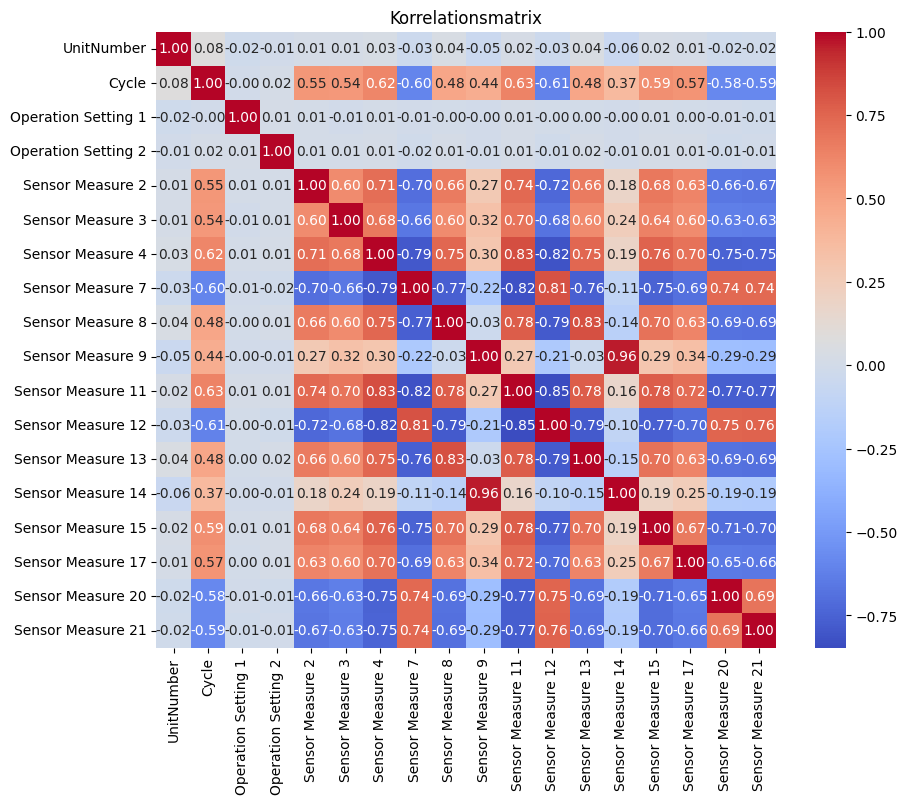

In [9]:
df_corr = df_train.corr()

# Korrelationsmatrix erstellen
correlation_matrix = df_train.corr()

#Korrelationsmatrix als Heatmap
plt.figure(figsize=(10, 8))  # Größe des Diagramms festlegen
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask = None)  # Heatmap mit Annotationsformat ".2f" für Dezimalstellen anzeigen
plt.title('Korrelationsmatrix')  # Diagrammtitel hinzufügen
plt.show()  # Heatmap anzeigen

/var/folders/3l/d2v_1x357pq5s8_3ddnj22640000gn/T/ipykernel_1253/560699731.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


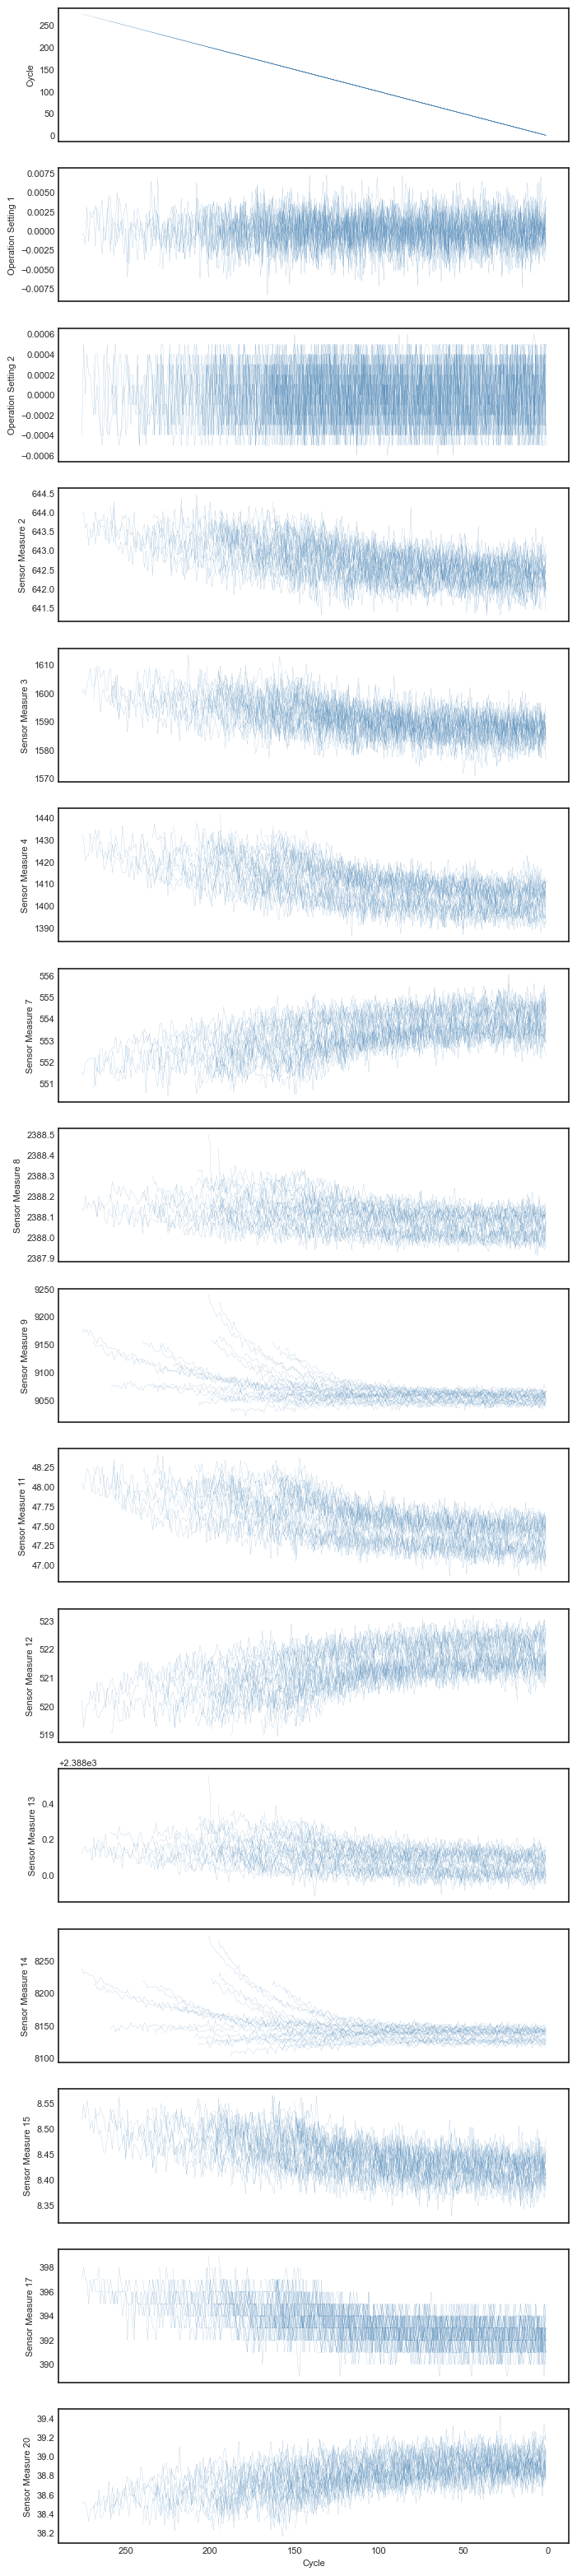

In [10]:
plt.style.use('seaborn-white') 
plt.rcParams['figure.figsize']=8,40 
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 8
plt.rcParams['lines.linewidth'] = 0.1
plot_items = list(df_train.columns)[1:-1]
fig,ax = plt.subplots(len(plot_items),sharex=True)
ax[0].invert_xaxis()

engines = list(df_train['UnitNumber'].unique())

for engine in engines[4:30]:
    for i,item in enumerate(plot_items):
        f = sns.lineplot(data=df_train[df_train['UnitNumber']==engine],x='Cycle',y=item,color='steelblue',ax=ax[i],
                        )

In [11]:
#RUL dem Trainingsdatensatz hinzufügen
rul = pd.DataFrame(df_train.groupby('UnitNumber')['Cycle'].max()).reset_index()
rul.columns = ['UnitNumber', 'max']
df_train = df_train.merge(rul, on=['UnitNumber'], how='left')
df_train['RUL'] = df_train['max'] - df_train['Cycle']
df_train.drop('max', axis=1, inplace=True)

df_train.head(10)   


,UnitNumber,Cycle,Operation Setting 1,Operation Setting 2,Sensor Measure 2,Sensor Measure 3,Sensor Measure 4,Sensor Measure 7,Sensor Measure 8,Sensor Measure 9,Sensor Measure 11,Sensor Measure 12,Sensor Measure 13,Sensor Measure 14,Sensor Measure 15,Sensor Measure 17,Sensor Measure 20,Sensor Measure 21,RUL
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187
5,1,6,-0.0043,-0.0001,642.10,1584.47,1398.37,554.67,2388.02,9049.68,47.16,521.68,2388.03,8132.85,8.4108,391,38.98,23.3669,186
6,1,7,0.0010,0.0001,642.48,1592.32,1397.77,554.34,2388.02,9059.13,47.36,522.32,2388.03,8132.32,8.3974,392,39.10,23.3774,185
7,1,8,-0.0034,0.0003,642.56,1582.96,1400.97,553.85,2388.00,9040.80,47.24,522.47,2388.03,8131.07,8.4076,391,38.97,23.3106,184
8,1,9,0.0008,0.0001,642.12,1590.98,1394.80,553.69,2388.05,9046.46,47.29,521.79,2388.05,8125.69,8.3728,392,39.05,23.4066,183
9,1,10,-0.0033,0.0001,641.71,1591.24,1400.46,553.59,2388.05,9051.70,47.03,521.79,2388.06,8129.38,8.4286,393,38.95,23.4694,182


/var/folders/3l/d2v_1x357pq5s8_3ddnj22640000gn/T/ipykernel_1253/2554178860.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


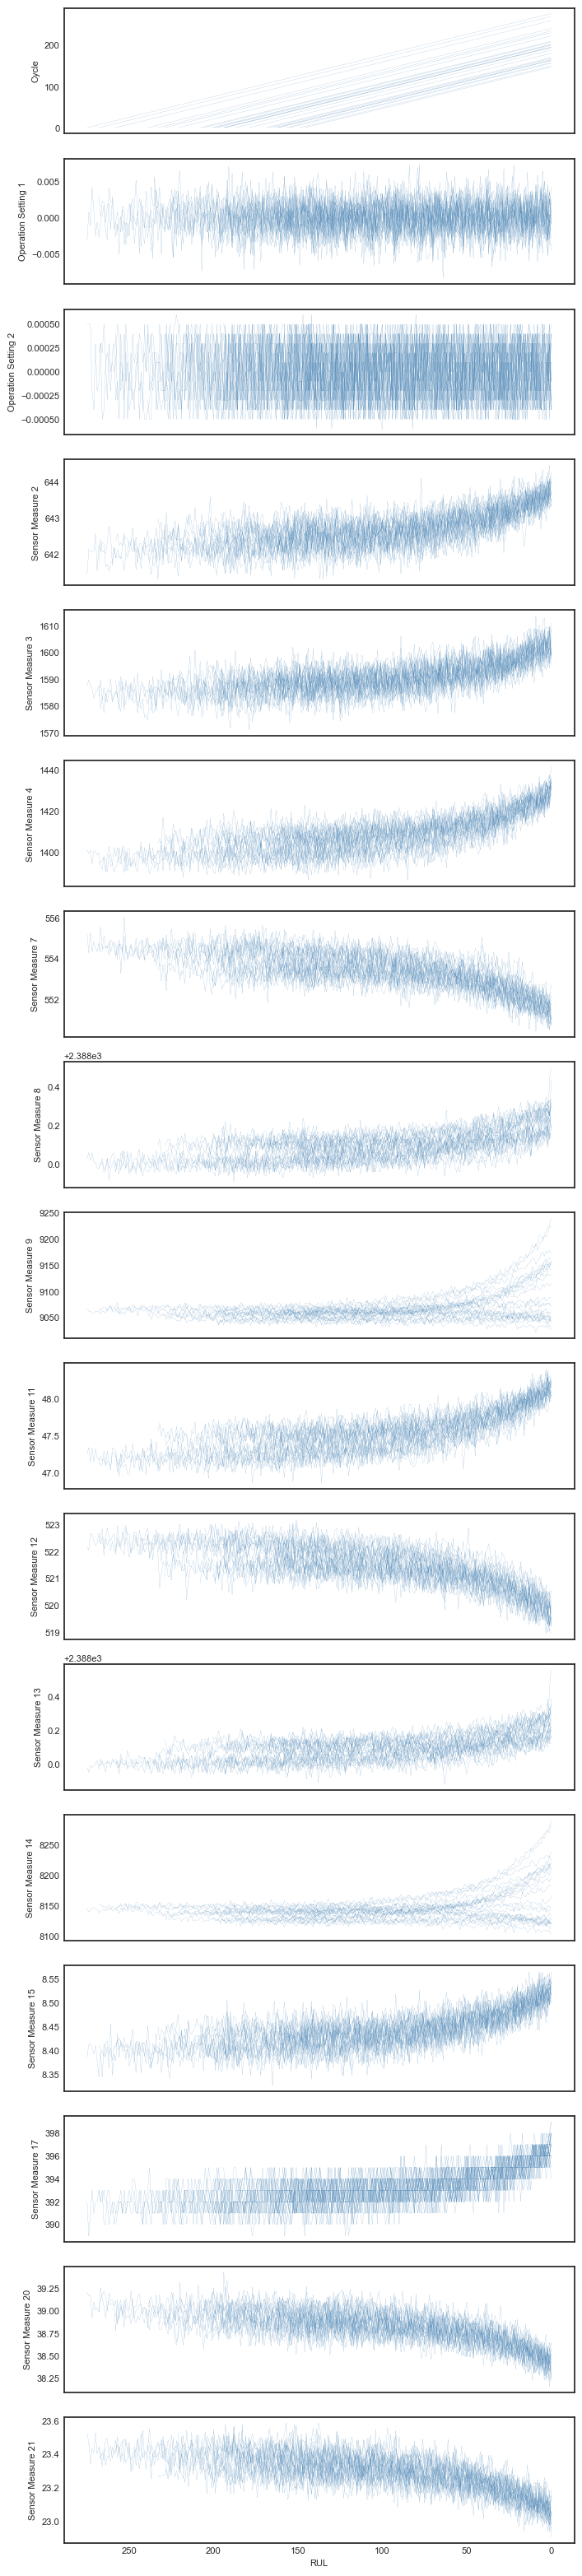

In [12]:
#Diagramm mit RUL auf der x-Achse
plt.style.use('seaborn-white') 

plot_items = list(df_train.columns)[1:-1]
fig,ax = plt.subplots(len(plot_items),sharex=True)
ax[0].invert_xaxis()

engines = list(df_train['UnitNumber'].unique())

for engine in engines[4:30]:
    for i,item in enumerate(plot_items):
        f = sns.lineplot(data=df_train[df_train['UnitNumber']==engine],x='RUL',y=item,color='steelblue',ax=ax[i],
                        )

Feature Selection


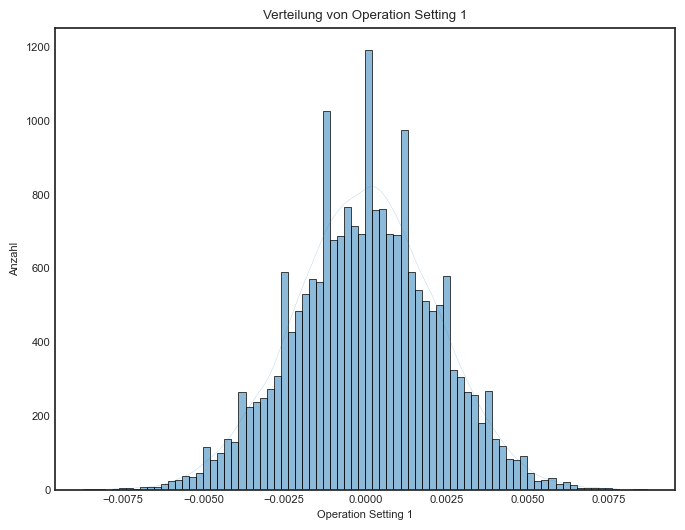

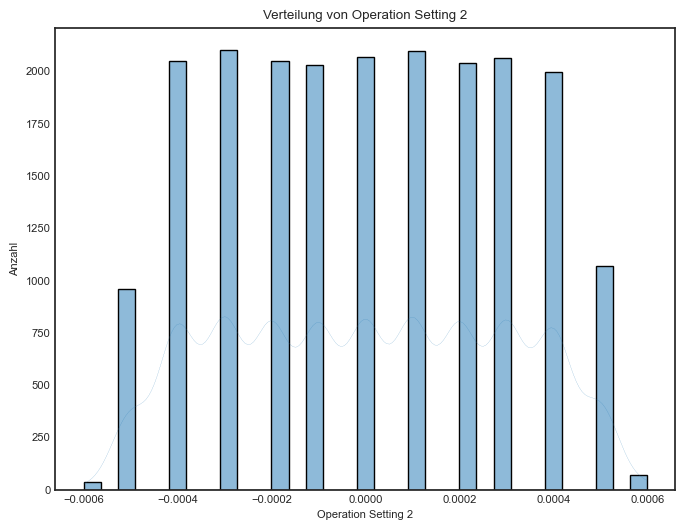

Mittelwert: -8.87014686636615e-06
Median: 0.0
Modus: 0.0
Standardabweichung: 0.002187313449015146
Varianz: 4.784340124242533e-06


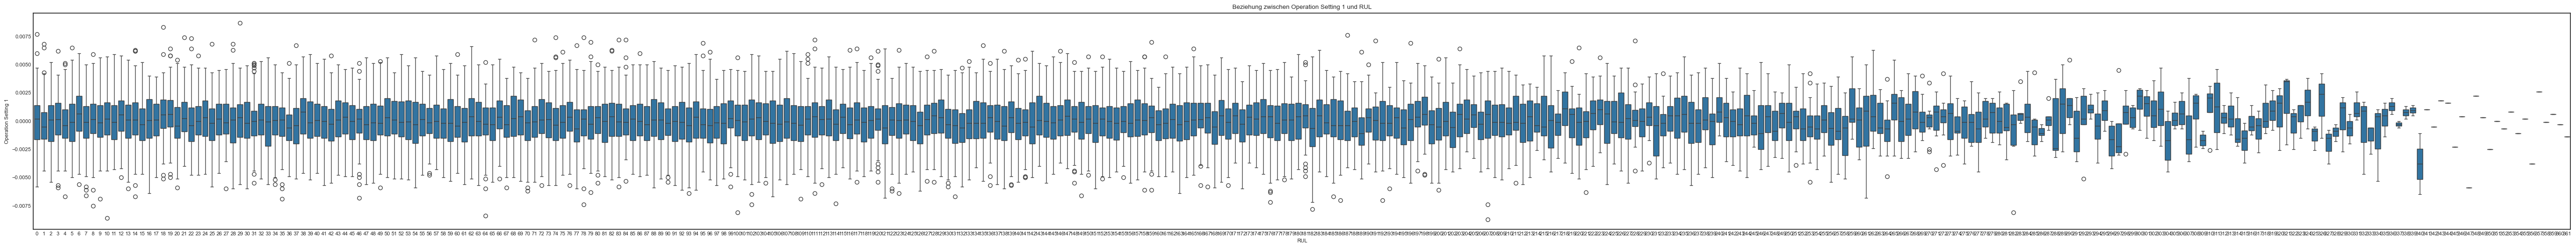

In [13]:

selected_feature = 'Operation Setting 1'
selected_feature2 = 'Operation Setting 2'

# Visualisierung der Verteilung des ausgewählten Features

plt.figure(figsize=(8, 6))
sns.histplot(df_train[selected_feature], kde=True)
plt.title('Verteilung von ' + selected_feature)
plt.xlabel(selected_feature)
plt.ylabel('Anzahl')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(df_train[selected_feature2], kde=True)
plt.title('Verteilung von ' + selected_feature2)
plt.xlabel(selected_feature2)
plt.ylabel('Anzahl')
plt.show()

# Analysiere die zentrale Tendenz
mean_value = df_train[selected_feature].mean()
median_value = df_train[selected_feature].median()
mode_value = df_train[selected_feature].mode()[0]  
print('Mittelwert:', mean_value)
print('Median:', median_value)
print('Modus:', mode_value)

# Analysiere die Streuung
std_deviation = df_train[selected_feature].std()
variance = df_train[selected_feature].var()
print('Standardabweichung:', std_deviation)
print('Varianz:', variance)

# Untersuche die Beziehung zur Zielvariable 
plt.figure(figsize=(70, 6))
sns.boxplot(x = df_train['RUL'], y= df_train[selected_feature])
plt.title('Beziehung zwischen ' + selected_feature + ' und RUL')
plt.xlabel('RUL')
plt.ylabel(selected_feature)
plt.show()

<Axes: title={'center': 'Feature importance for train set, with Random Forests'}>

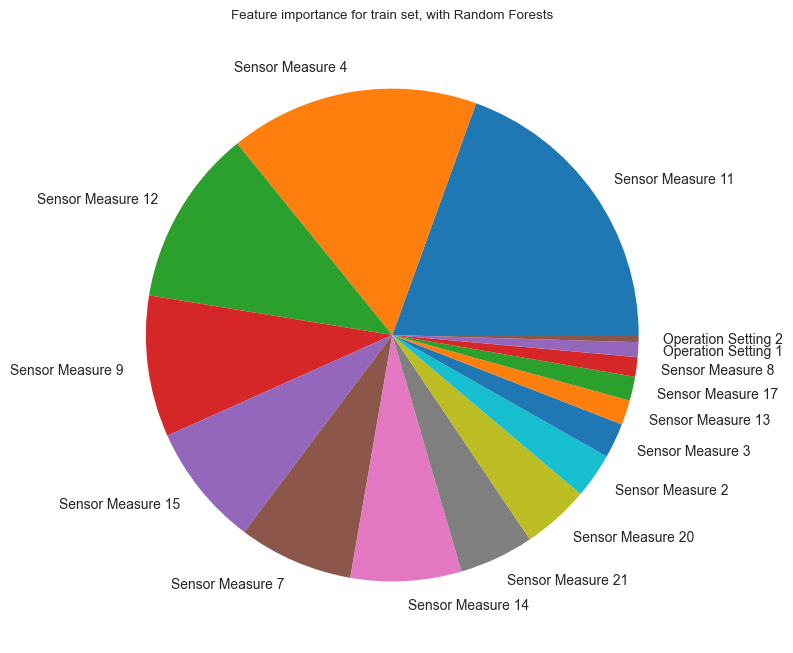

In [14]:
# Random Forests for feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

#X, y splitting
X_imp=df_train.drop(columns=["RUL", "UnitNumber", "Cycle"])
y_imp=df_train["RUL"]

#feature importances
rf_clf = RandomForestClassifier(n_estimators = 500, max_depth=5)
rf_clf.fit(X_imp, y_imp)


pd.Series(rf_clf.feature_importances_, index = X_imp.columns).nlargest(30).plot(kind = 'pie',
figsize = (8, 8), title = 'Feature importance for train set, with Random Forests', fontsize=10)

/var/folders/3l/d2v_1x357pq5s8_3ddnj22640000gn/T/ipykernel_1253/2423212482.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "UnitNumber", y ="Cycle", data=datachart, palette= "mako", order=datachart['UnitNumber'])


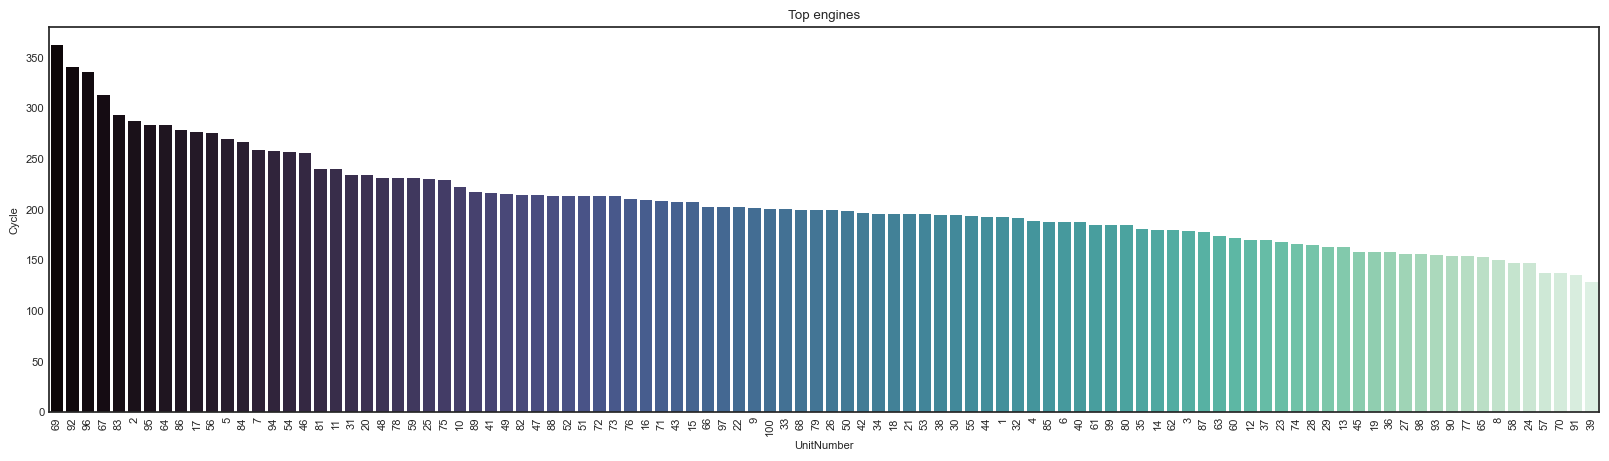

In [15]:
plotnumbers = df_train.groupby('UnitNumber')['Cycle'].max().reset_index().sort_values("Cycle", ascending=False)

plotnumbers.reset_index(drop=True, inplace=True)
datachart = plotnumbers.head(100)

plt.figure(figsize = (20,5))
sns.barplot(x = "UnitNumber", y ="Cycle", data=datachart, palette= "mako", order=datachart['UnitNumber'])
plt.title("Top engines")
plt.xticks(rotation=90);

#auf fehlende daten untersuchen
#außreißer -> normalisieren

Normalization

In [20]:
#Normalisierung der Daten
# MinMaxScaler initialisieren
scaler = MinMaxScaler()

# Skalieren der Daten
scaled_data = scaler.fit_transform(df_train)
df_train_scaled = pd.DataFrame(scaled_data, columns=df_train.columns)
#ausgeben der Daten
print("Original Data:")
print(df_train)
print("\nScaled Data:")
print(df_train_scaled)

Original Data:
       UnitNumber     Cycle  Operation Setting 1  Operation Setting 2  \
0               1  0.000000             0.459770             0.166667   
1               1  0.002770             0.609195             0.250000   
2               1  0.005540             0.252874             0.750000   
3               1  0.008310             0.540230             0.500000   
4               1  0.011080             0.390805             0.333333   
...           ...       ...                  ...                  ...   
20626         100  0.540166             0.477011             0.250000   
20627         100  0.542936             0.408046             0.083333   
20628         100  0.545706             0.522989             0.500000   
20629         100  0.548476             0.436782             0.750000   
20630         100  0.551247             0.316092             0.083333   

       Sensor Measure 2  Sensor Measure 3  Sensor Measure 4  Sensor Measure 7  \
0              0.183735    